In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [221]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [222]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, plot, init_notebook_mode, iplot

#### Import the data set directly from Kaggle.com

In [223]:
import io
import requests
from io import StringIO
url = 'https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv'
s=requests.get(url).text
pd.read_csv('https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv', sep='\t')
# Dataset is now stored in a Pandas Dataframe

,<!DOCTYPE html>
0,"<html lang=""en"">"
1,<head>
2,<title>Netflix Movies and TV Shows | Kaggl...
3,"<meta charset=""utf-8"" />"
4,"<meta name=""robots"" content=""index, follow..."
...,...
191,</script>
192,</div>
193,</main>
194,</body>


#### Import Data from Desktop

In [224]:
nf_movies =pd.read_csv(r"C:\Users\user\Desktop\archive/netflix_titles.csv")


## Basic Information

In [328]:
nf_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,Maturity
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,Teen
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,Teen
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,June,Adults,Adults


In [226]:
nf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        5398 non-null object
cast            7069 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
rating          7780 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
description     7787 non-null object
dtypes: int64(1), object(11)
memory usage: 395.5+ KB


In [227]:
nf_movies.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

## Preliminary Processing

###### 1. I want to separate the year and month of the movie premiere date (date_added) *First CellAfter This Heading
###### 2. Then make the age rating in more understandable form * Second Row After This Heading

There are 7 movies and TV shows without rating, it's not a problem to find out the rating. Mostly used IMDb.)


In [228]:
nf_movies['date_added'] = nf_movies['date_added'].fillna('No data')

nf_movies ['year_added'] = nf_movies['date_added'].apply(lambda x: x[-4:len(x)])
nf_movies ['month_added'] = nf_movies ['date_added'].apply(lambda x: x.split(' ')[0])

nf_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December


In [242]:
nf_movies.query('rating != rating')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


In [230]:
nf_movies.iloc[67, 8] = 'R' 
nf_movies.iloc[2359, 8] = 'TV-14'
nf_movies.iloc[3660, 8] = 'TV-PG'
nf_movies.iloc[3736, 8] = 'R'
nf_movies.iloc[3737, 8] = 'R'
nf_movies.iloc[3738, 8] = 'R'
nf_movies.iloc[4323, 8] = 'PG-13'

In [235]:
nf_movies['rating'].unique() #to compare the ratings

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [244]:
nf_movies[nf_movies["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


In [236]:
nf_movies[nf_movies['date_added'].isna()] #Date Added Column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added


In [246]:
#Since there are only 7 rows so I decided to find replacements.
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in rating_replacements.items():
    nf_movies.iloc[id, 8] = rate
    
nf_movies ['rating'].isna().sum()

0

In [267]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

nf_movies['target_ages'] = nf_movies['rating'].replace(ratings_ages)
nf_movies['target_ages'].unique()


array(['Adults', 'Teens', 'Older Kids', 'Kids', 'TV-MA '], dtype=object)

In [306]:
raring_order = nf_movies["rating"].value_counts().to_frame()
raring_order

,rating
TV-MA,1847
TV-14,1271
R,666
TV-PG,506
PG-13,386
PG,247
TV-Y,116
TV-G,111
TV-Y7,95
NR,79


In [268]:
#Fixing Datatypes

nf_movies['type'] = pd.Categorical(nf_movies['type'])

# target_ages is another category (4 classes)
nf_movies['target_ages'] = pd.Categorical(nf_movies['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
nf_movies['year_added'] = pd.to_numeric(nf_movies['year_added'])

### Classifying the movies by countries

In [ ]:
nf_movies['country'] = nf_movies['country'].fillna('No data')

countries = []
for i in range(len(nf_movies.index)):
    x = nf_movies.iloc[i, 5].split(',')
    for j in range(len(x)):
        if x[j].strip() not in countries:
            countries.append(x[j].strip())
        else:
            continue
            
countries.remove('')


In [ ]:
countries

In [ ]:
for i in range(len(countries)):
    nf_movies[countries[i]] = 0
    for j in range(len(nf_movies.index)):
        if countries[i] in nf_movies.iloc[j, 5]:
            nf_movies[countries[i]][j] = 1
            
nf_movies.head(5) 


### Classifying movies and TV shows by genre

In [ ]:
genres = []
for i in range(len(nf_movies.index)):
    x = nf_movies.iloc[i, 10].split(',')
    for j in range(len(x)):
        if x[j].strip() not in genres:
            genres.append(x[j].strip())
        else:
            continue

In [ ]:
for i in range(len(genres)):
    nf_movies[genres[i]] = 0
    for j in range(len(nf_movies.index)):
        if genres[i] in nf_movies.iloc[j, 10]:
            nf_movies[genres[i]][j] = 1

## Output of 165 samples

In [318]:
nf_movies.sample(165)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,Maturity
6081,s6082,Movie,The Amityville Horror,Andrew Douglas,"Ryan Reynolds, Melissa George, Chloë Grace Mor...",United States,"January 1, 2020",2005,R,89 min,Horror Movies,This hair-raising remake of the 1979 horror hi...,2020,January,Adults,Adults
7213,s7214,Movie,Tremors: Shrieker Island,Don Michael Paul,"Michael Gross, Jon Heder, Caroline Langrishe, ...",United States,"October 20, 2020",2020,PG-13,102 min,"Action & Adventure, Horror Movies",When massive mutant creatures infiltrate an is...,2020,October,Teens,Teen
3127,s3128,Movie,Jarhead: Law of Return,Don Michael Paul,"Amaury Nolasco, Devon Sawa, Robert Patrick, Je...","Israel, United States","December 25, 2019",2019,R,103 min,"Action & Adventure, Dramas",When a U.S. senator’s son is held captive by H...,2019,December,Adults,Adults
6080,s6081,Movie,The American President,Rob Reiner,"Michael Douglas, Annette Bening, Martin Sheen,...",United States,"January 1, 2021",1995,PG-13,113 min,"Comedies, Dramas, Romantic Movies",The widowed president strikes up a romance wit...,2021,January,Teens,Teen
4709,s4710,Movie,Outside In,Lynn Shelton,"Jay Duplass, Edie Falco, Kaitlyn Dever, Ben Sc...",United States,"June 1, 2018",2018,TV-MA,110 min,"Dramas, Independent Movies",After serving time for a crime he didn’t commi...,2018,June,Adults,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,s729,Movie,Barça Dreams,Jordi Llompart,"Johan Cruyff, Andrés Iniesta, Gary Lineker, Xa...",Spain,"September 1, 2018",2015,TV-MA,122 min,"Documentaries, International Movies, Sports Mo...",Explore the history and philosophies behind on...,2018,September,Adults,Adults
2653,s2654,Movie,Haunters: The Art of the Scare,Jon Schnitzer,NaN,United States,"January 2, 2018",2017,TV-MA,89 min,"Documentaries, Horror Movies",This documentary takes us into the world of th...,2018,January,Adults,Adults
5978,s5979,Movie,Tamasha,Imtiaz Ali,"Ranbir Kapoor, Deepika Padukone, Piyush Mishra...",India,"August 2, 2018",2015,TV-14,133 min,"Dramas, International Movies, Romantic Movies","Meeting while on vacation, Ved and Tara sense ...",2018,August,Teens,Teen
5078,s5079,Movie,Raja Natwarlal,Kunal Deshmukh,"Emraan Hashmi, Humaima Malik, Paresh Rawal, Ka...",India,"November 1, 2018",2014,TV-14,131 min,"Dramas, International Movies, Thrillers",A small-time con man assembles a team to help ...,2018,November,Teens,Teen


# Data Visualization

In [ ]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie',]
plt.pie(nf_movies['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['chocolate','maroon'], startangle=90, pctdistance=0.8, textprops={'color':"darkblue"})
plt.title('Type of Netflix Content', fontsize=30, color='darkblue')   
plt.subplots_adjust(top=0.80)
plt.axis('equal')
plt.show()


In [247]:
df_tv = nf_movies[nf_movies["type"] == "TV Show"]
nf_movies = nf_movies[nf_movies["type"] == "Movie"]

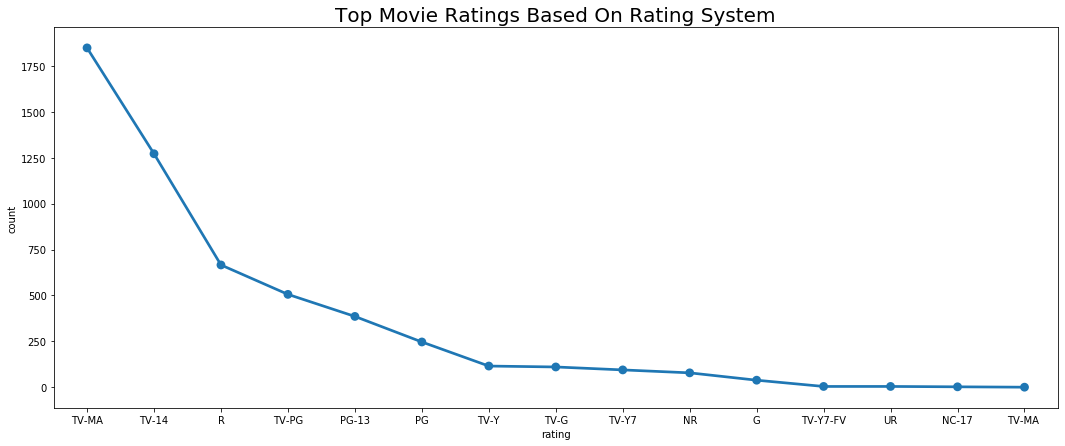

In [324]:
movie_ratings = nf_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()


Text(0, 0.5, 'Amount of viewers')

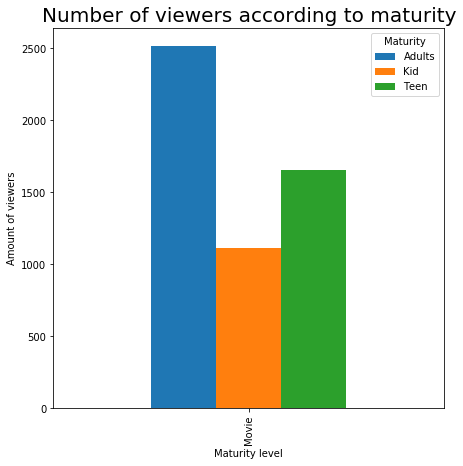

In [333]:
d={'TV-Y':"Kid", 'TV-Y7':"Kid", 'G':"Kid", 'TV-G':"Kid", 'PG':"Kid", 'TV-PG':"Kid",'PG-13':"Teen", 'TV-14':"Teen",'TV-MA':"Adults",'R':"Adults",'NC-17':"Adults"}
nf_movies['Maturity']=nf_movies['rating'].map(d)
nf_movies.pivot_table('rating',index='type',columns='Maturity',aggfunc='count').plot(kind='bar',figsize=(7, 7))
plt.title('Number of viewers according to maturity', size = '20')
plt.xlabel("Maturity level")
plt.ylabel("Amount of viewers")


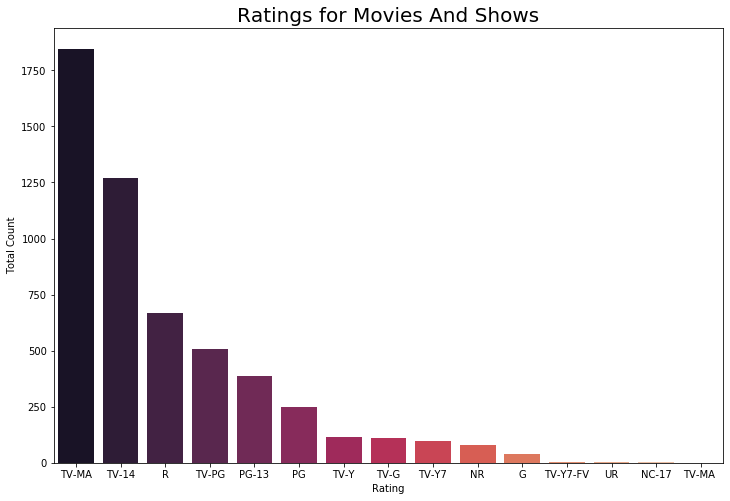

In [332]:
plt.figure(figsize = (12,8))
sns.countplot(nf_movies.rating, order = raring_order.index[0:15], palette="rocket")
plt.title("Ratings for Movies And Shows", size="20")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

### Data Visualization for different categories

In [345]:
def TPCSingle(a):
    nf_movies[a].value_counts().head(5).plot(kind='pie',figsize=(8, 8))
    plt.xlabel(" ", labelpad=14)
    plt.ylabel(a, labelpad=14)
    plt.title(" ", y=1.02);

    
from collections import Counter 

# For Multiple Values like Listed_in and Cast

def TPCMultiple(a):
    l=list()
    for i in nf_movies[a].dropna(): #We can drop null values because it will be unfair to replace it with sommeone else name
        for j in i.split(','):
            l.append(j.strip())
    d = Counter(l) 
    df_new=pd.DataFrame(d.items(), columns=['Category', 'Count'])
    return df_new.sort_values(by=['Count'],ascending=False).head(5)

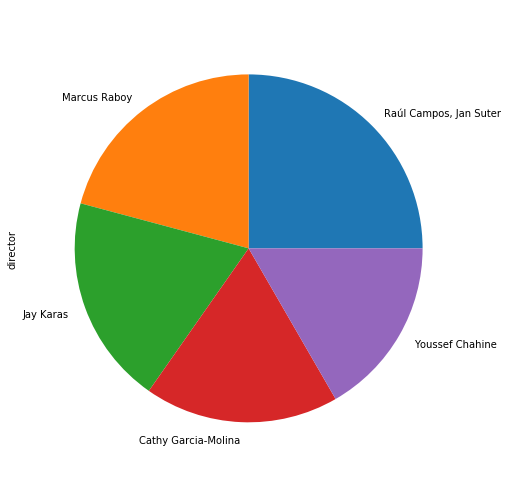

In [346]:
TPCSingle('director')


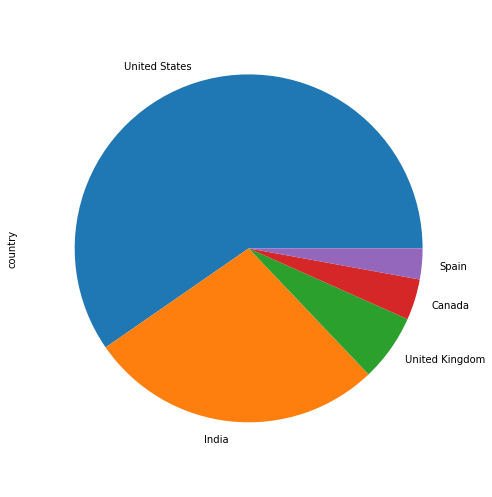

In [347]:
TPCSingle('country')

In [338]:
TPCMultiple('cast')

,Category,Count
1050,Anupam Kher,41
3114,Shah Rukh Khan,35
1795,Om Puri,30
559,Naseeruddin Shah,30
1793,Akshay Kumar,29


In [340]:
TPCMultiple('listed_in')

,Category,Count
1,International Movies,2437
0,Dramas,2106
9,Comedies,1471
7,Documentaries,786
3,Action & Adventure,721


# Conclusion based on the analyzed data

Nearly 2/3rd of the content on netflix are movies (69.05%) while the rest are TV Shows (30.95%)

Most of the content were released after 2010.

The US has the highest number of movies/shows, followed by India which is a far cry compared to that of United States.

Raul Campos and Jan Sutter are the joint highest directors, followed by Marcus Rabey, Jay Karas, Cathy Garcia, Molina and Youssef Chachine in that order.

All the top actors from India. with Anupam Kher appearing 41 times on the log. Shah Rukh came second, closely followed by Om Puri and Naseeruddin Shah with both 30 appeareance, and Akshay Kumar. 

In the category of movies, more users enjoyed International Movies, followed by Dramas, Comedies, Documentaries and Action & Adventure.